In [368]:
import pandas as pd
import matplotlib.pyplot as plt

dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')


Analise Preliminar

In [369]:
dfClientes.sample(5)

,id,nome,sexo,dt_nasc
578,579,Nicole Ferreira,F,11/3/1979
225,226,Eduarda Santos,F,1/10/1961
275,276,Luiz Oliveira,M,12/9/1960
687,688,Joao Melo,M,4/4/1960
213,214,Matilde Santos,F,12/27/1957


In [370]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [371]:
dfClientes[dfClientes.isnull().T.any()] #retorna os registros em que algum dado é nulo


,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [372]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [373]:
dfProdutos.describe()

,id,valor
count,10.00000,1.000000e+01
mean,5.50000,3.222752e+05
std,3.02765,1.015119e+06
min,1.00000,2.000000e+01
25%,3.25000,2.475000e+02
50%,5.50000,7.800000e+02
75%,7.75000,2.100000e+03
max,10.00000,3.211352e+06


In [374]:
dfProdutos.boxplot(column=['valor'])

<Axes: >

In [375]:
dfProdutos[dfProdutos.valor>1000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


In [376]:
dfProdutos[dfProdutos.valor<1000000].boxplot(column=['valor'])

<Axes: >

## DATA CLEANING


### DADOS NULOS


In [377]:
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'sem nome'
dfClientes.loc[dfClientes.sexo.isnull(), 'sexo'] = 'o'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '1/1/2020'

In [378]:
dfClientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,sem nome,M,1/1/2020
287,288,Victor Ribeiro,o,12/17/1974


In [379]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [380]:
dfProdutos.isnull().sum()

id         0
produto    0
valor      0
dtype: int64

In [381]:
dfLojas.isnull().sum()

id        0
cidade    0
dtype: int64

In [382]:
dfVendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [383]:
dfPagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

### Outliers (valores fora do padrão)

In [384]:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]*10
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,32113520.0


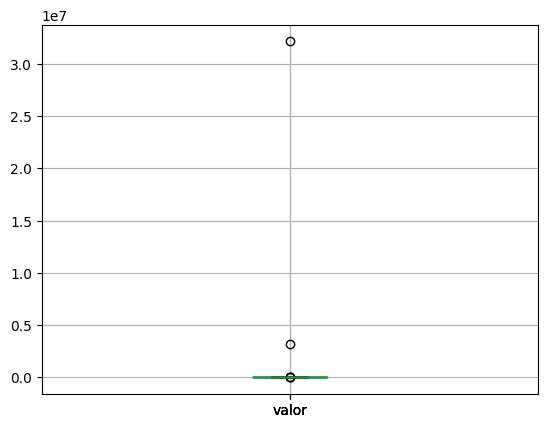

In [385]:
dfProdutos.boxplot(column=['valor'])
plt.show()

### Consistencia



In [386]:
# queremos verificar se o id de clientes consta em toda a base de id de vendas, para verificar se nao existem 
# clientes que nunca fizeram compras ou compras feitas por clientes que nunca fizeram compras

dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

# ou seja, o retorno de falses foi 0, pois nao existe uma venda que o id_client nao exista na base de clientes
# base consistente

,id,id_cliente,id_loja,id_produto,dt_venda


In [387]:

dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [388]:

dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [389]:
dfPagamentos[~dfPagamentos.id_venda.isin(dfVendas.id)] #ou seja, toda venda está constando pagamento, ou seja, consistente

,id,id_venda,dt_pgto


In [390]:
# vendas que nao estejam registradas nos pagamentos

dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)].count()

# 928 vendas que nao geraram pagamento

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

### DADOS DUPLICADOS 

In [391]:
dfClientes.nome.duplicated().sum() # 109 nomes duplicados, verificar se sao dados duplicados

109

In [392]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [393]:
dfClientes[dfClientes.nome == "Anna Melo"] #data de nascimento diferentes, entao pessoas distintas

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [394]:
dfClientes.drop('id', axis=1).duplicated().sum() # nao existe 2 linhas totalmente iguais, ou seja, dados consistentes

0

In [395]:
dfProdutos.duplicated().sum()

0

In [396]:
dfLojas.cidade.duplicated().sum()

0

In [397]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [398]:
dfVendas[(dfVendas.id_cliente == 559) & (dfVendas.id_loja ==2) & (dfVendas.id_produto ==5)] 

# duas vendas completamente iguais, temos que verificar se o cliente realmente comprou o msm produto 2x
# ou se é inconsistencia, para isso devemos verificar se há dois pagamentos para essa mesma venda

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [399]:
dfPagamentos.drop('id', axis=1).duplicated().sum()

# ou seja, nosso dado está duplicado apenas em vendas mas nao em pagamentos, ou seja, a compra foi realizada
# apenas uma vez

0

### Tratamento de tipo de dados (trabalhando com datas)

In [400]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [401]:
dfVendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [402]:
dfPagamentos

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


In [403]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,32113520.0


In [404]:
dfLojas

,id,cidade
0,1,São Paulo
1,2,Rio de Janeiro
2,3,Curitiba
3,4,Belo Horizonte
4,5,Santa Catarina
5,6,Recife
6,7,Salvador
7,8,Brasília
8,9,Palmas
9,10,Vitória


### DEFININDO INDEXEX

In [405]:
dfClientes = dfClientes.set_index("id")
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [406]:
dfClientes.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='id', length=1000)

In [407]:
dfLojas = dfLojas.set_index("id")
dfPagamentos = dfPagamentos.set_index("id")
dfProdutos= dfProdutos.set_index("id")
dfVendas - dfVendas.set_index("id")

,dt_venda,id,id_cliente,id_loja,id_produto
0,NaT,NaN,NaN,NaN,NaN
1,0 days,NaN,24.0,0.0,0.0
2,0 days,NaN,-43.0,-2.0,5.0
3,1 days,NaN,-315.0,-3.0,-5.0
4,0 days,NaN,-41.0,5.0,-2.0
...,...,...,...,...,...
2996,0 days,NaN,-85.0,5.0,-4.0
2997,0 days,NaN,145.0,-6.0,1.0
2998,0 days,NaN,-568.0,0.0,-3.0
2999,0 days,NaN,607.0,0.0,1.0


In [408]:
dfProdutos.index #criamos uma chave primaria, que liga as tabelas, criando uma chamada pra cada uma das linhas

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='id')

### DATA FUSION


In [409]:
df =  dfVendas.join(dfClientes.add_prefix('clientes_'), on='id_cliente')
df =  df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df =  df.join(dfProdutos.add_prefix('produtos_'), on='id_produto')

In [410]:
dfVendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [411]:
df

,id,id_cliente,id_loja,id_produto,dt_venda,clientes_nome,clientes_sexo,clientes_dt_nasc,loja_cidade,produtos_produto,produtos_valor
0,1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
1,2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
2,3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
3,4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
4,5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2996,2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2997,2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0
2998,2999,163,2,1,2020-09-27,Ana Pereira,F,1967-01-10,Rio de Janeiro,mouse,20.0


In [412]:
dfPagamentos


,id_venda,dt_pgto
id,,
1,1,2018-01-24
2,2,2018-02-17
3,3,2018-02-14
4,5,2018-01-23
5,7,2018-02-15
...,...,...
2068,2990,2020-10-04
2069,2992,2020-10-10
2070,2994,2020-10-09


In [413]:
df = df.set_index('id')

In [414]:
df = df.join(dfPagamentos.set_index('id_venda'))

In [415]:
df

,id_cliente,id_loja,id_produto,dt_venda,clientes_nome,clientes_sexo,clientes_dt_nasc,loja_cidade,produtos_produto,produtos_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


### TRATANDO DADOS NULOS DO DF FINAL

In [416]:
df.isnull().sum() #apenas data de pagamento tem dados nulos, pelo fato de terem vendas sem pagamentos, compras
                  # nao finalizadas

id_cliente            0
id_loja               0
id_produto            0
dt_venda              0
clientes_nome         0
clientes_sexo         0
clientes_dt_nasc      0
loja_cidade           0
produtos_produto      0
produtos_valor        0
dt_pgto             928
dtype: int64

### CRIANDO NOVOS DADOS (FEATURE ENGINEERING)


1. Qual o tempo medio entre compra e pagamento? (tempo_pg) #nao temos esse dado, podemos calcular
2. Qual produto mais gera inadiplencia? #precisamos de uma coluna para classificar se uma compra foi inadiplente
3. Existe alguma relação entre idade e inadiplencia? #construir uma coluna de "cliente_idade" e simular correlação


In [417]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0 #procura onde nao tem data de pagamento, e na coluna pg mudamos valor pra 0

In [418]:
df

,id_cliente,id_loja,id_produto,dt_venda,clientes_nome,clientes_sexo,clientes_dt_nasc,loja_cidade,produtos_produto,produtos_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [419]:
df['tempo_pgto']= (df.dt_pgto - df.dt_venda).dt.days # tempo entre pagamento e compra, transforma em dias para facilitar a analise

In [420]:
df.loc[df['produtos_valor'] == 32113520.0, 'produtos_valor' ] = 32113.52


### ANÁLISE: PERGUNTAS E RESPOSTAS


In [421]:
### LOJAS E PRODUTOS MAIS VENDIDOS
import matplotlib.pyplot as plt

graf_dados = df.groupby('loja_cidade').count().produtos_valor.sort_values(ascending=False)




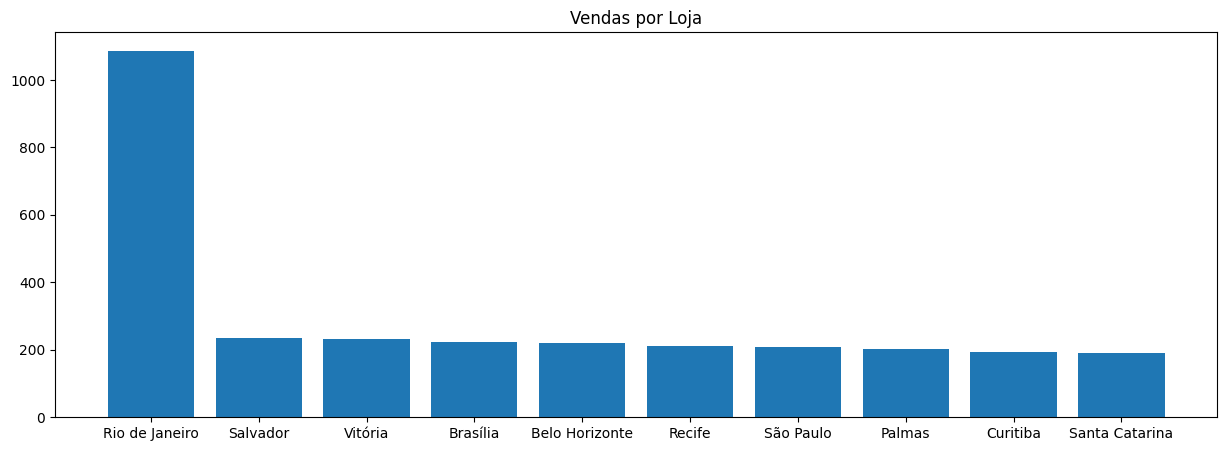

In [422]:
plt.figure(figsize=(15,5))

plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')
plt.show()

In [423]:
### PRODUTOS QUE MAIS VENDEM

produtos_vendidos = df.groupby('produtos_produto').count().produtos_valor.sort_values(ascending=False)

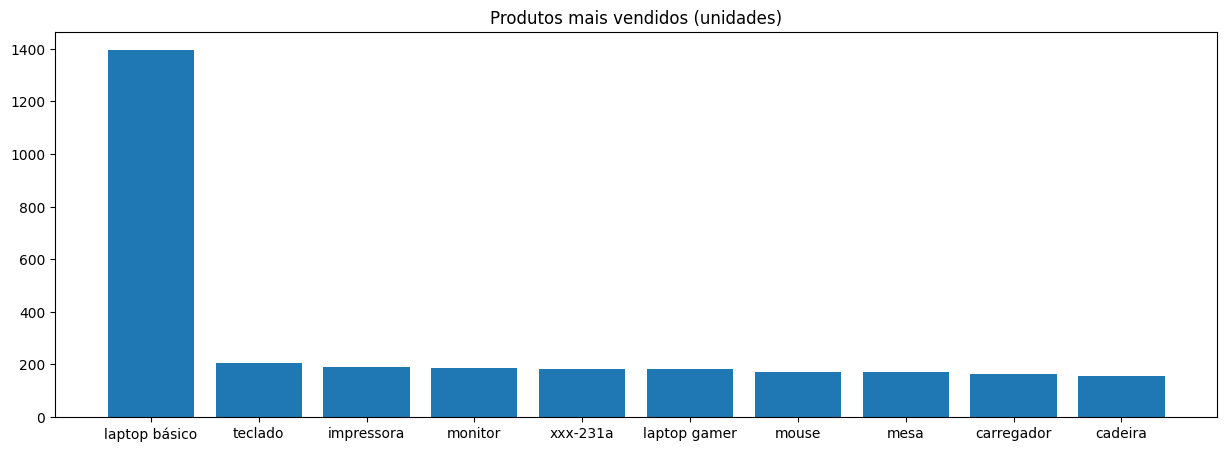

In [424]:
plt.figure(figsize=(15,5))
plt.bar(produtos_vendidos.index, produtos_vendidos.values)
plt.title('Produtos mais vendidos (unidades)')
plt.show()


In [425]:
### RECEITAS POR LOJA ###

graf_receita = df[['loja_cidade','produtos_valor']].groupby('loja_cidade').sum().produtos_valor.sort_values(ascending=False)




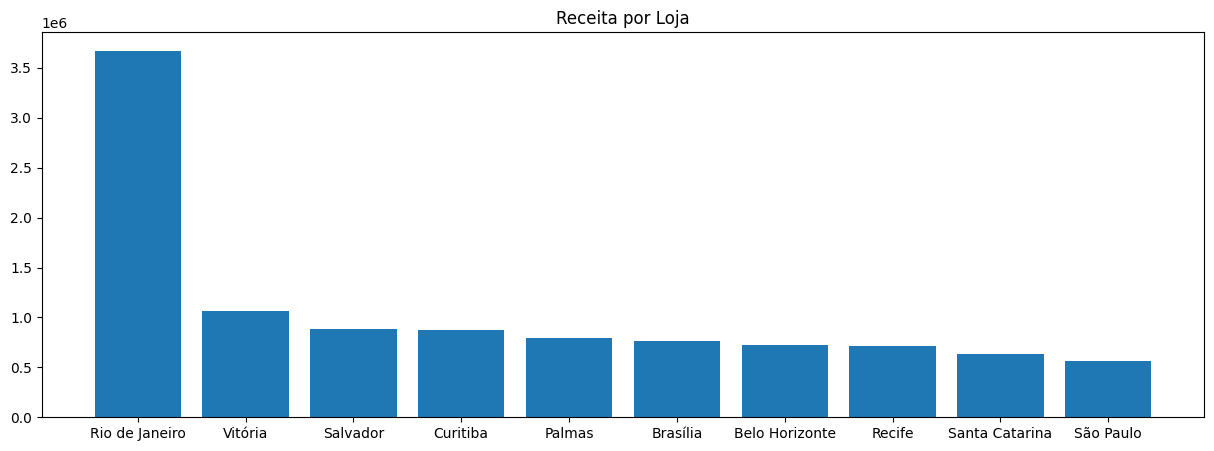

In [426]:
plt.figure(figsize=(15,5))
plt.bar(graf_receita.index,graf_receita.values)
plt.title('Receita por Loja')
plt.show()

In [427]:
graf_receita.max()/graf_receita[graf_receita!=graf_receita.max()].mean()

4.715135190014922

In [428]:
### RECEITA POR PRODUTO ###
graf_receita_produto = df[['produtos_produto','produtos_valor']].groupby('produtos_produto').sum().produtos_valor.sort_values(ascending=False)



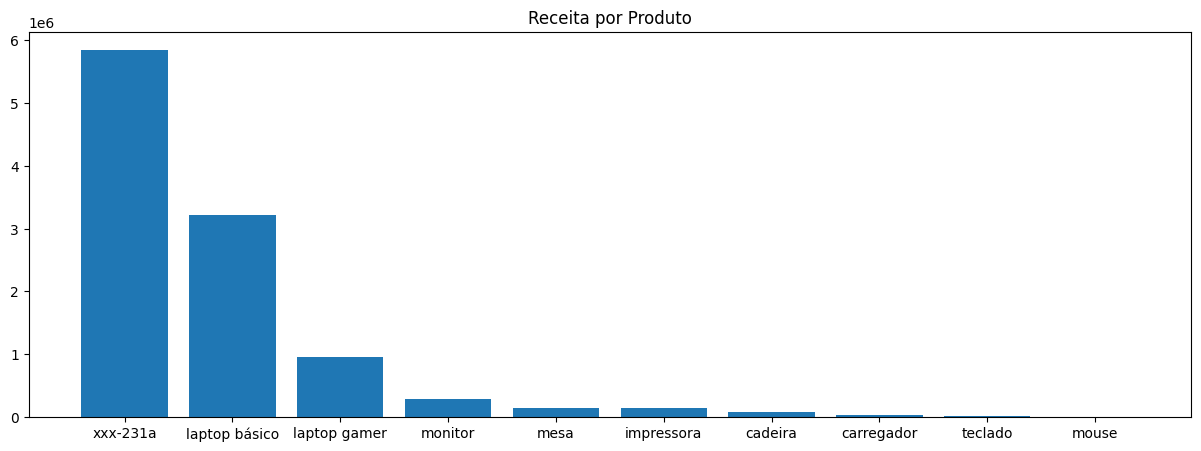

In [429]:
plt.figure(figsize=(15,5))
plt.bar(graf_receita_produto.index, graf_receita_produto.values)
plt.title('Receita por Produto')
plt.show()

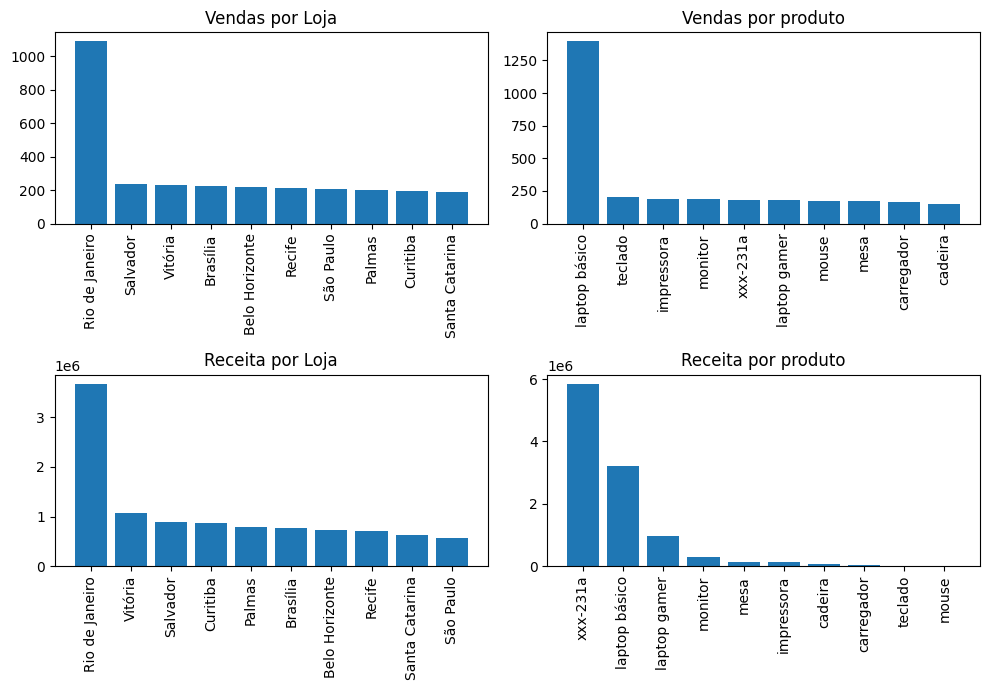

In [430]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade').count().produtos_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
graf_dados = df.groupby('produtos_produto').count().produtos_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produto')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
graf_dados = df[['loja_cidade','produtos_valor']].groupby('loja_cidade').sum().produtos_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
graf_dados = df[['produtos_produto','produtos_valor']].groupby('produtos_produto').sum().produtos_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')
plt.xticks(rotation=90)

plt.tight_layout() # nao deixa nenhuma informação de um grafico se sobrepor à outro grafico visualmente
plt.show()


## RECEITAS POR CLIENTE

In [431]:

receita_cliente = df[['clientes_nome', 'produtos_valor']].groupby('clientes_nome').sum().produtos_valor.sort_values(ascending=False)
receita_cliente 


clientes_nome
Eduardo Costa        107920.56
Julieta Fernandes    106810.56
Emily Araujo          97040.56
Melissa Lima          89477.04
Kauan Almeida         83347.04
                       ...    
José Pinto               20.00
Diego Sousa              20.00
Julieta Barros           20.00
Enzo Lima                20.00
Igor Azevedo             20.00
Name: produtos_valor, Length: 861, dtype: float64

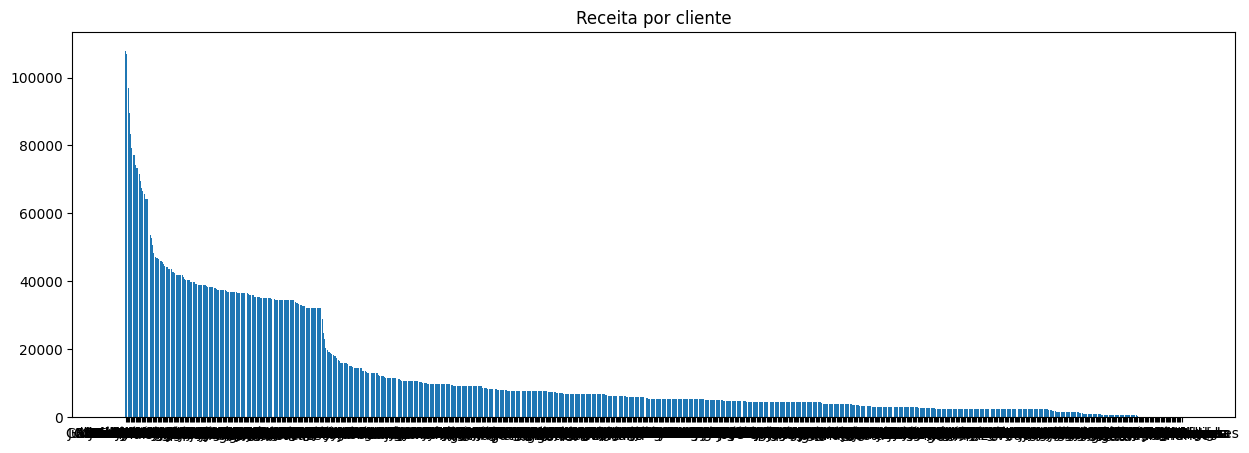

In [432]:
plt.figure(figsize=(15,5))
plt.bar(receita_cliente.index, receita_cliente.values)
plt.title("Receita por cliente")
plt.show()

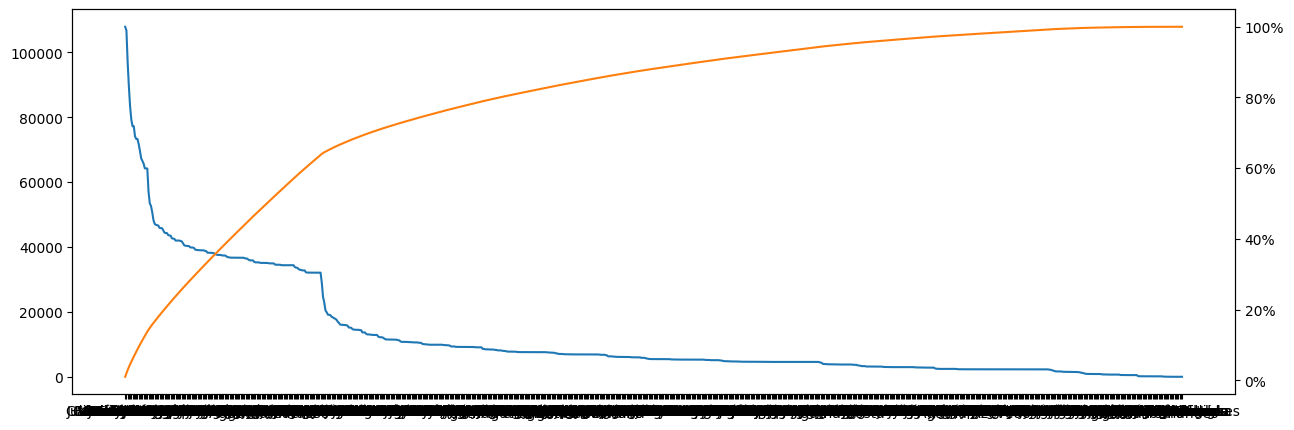

In [433]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(receita_cliente.index, receita_cliente.values, color='C0')
ax2 = ax.twinx()
ax2.plot(receita_cliente.index,receita_cliente.values.cumsum()/receita_cliente.values.sum()*100, color='C1') #soma acumulada das receitas em porcentagem
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.show()

In [434]:
receita_acumulada = receita_cliente.cumsum()/receita_cliente.sum()

receita_acumulada[receita_acumulada<0.6].count() / receita_acumulada.count() 
#receita acumulada até 60% do total, dividido pela receita acumulada total
#chegamo a 0.170, ou seja, 17% dos clientes representam 60% das receitas acumuladas


0.17073170731707318

## PARETO


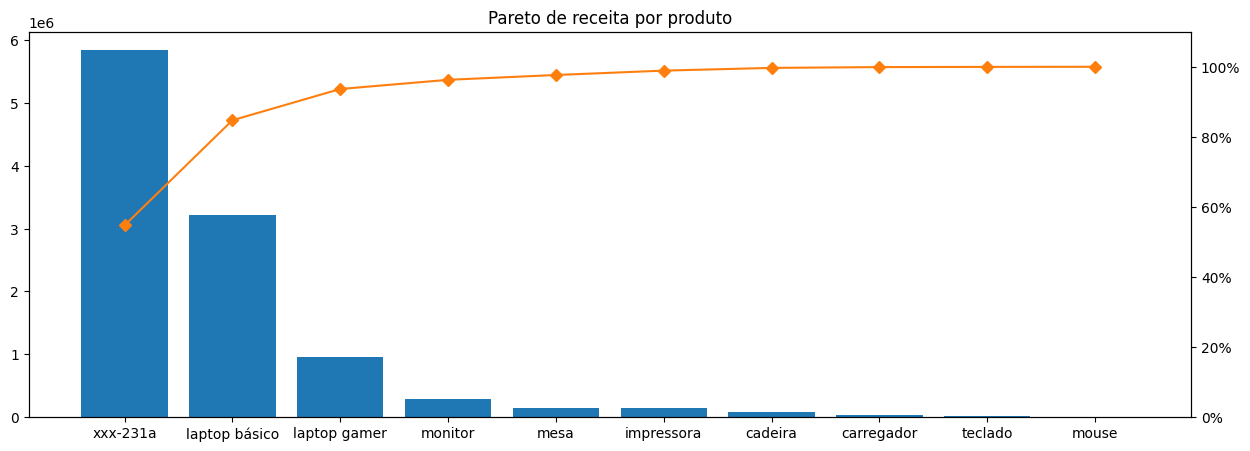

In [435]:
receita_pareto = df[['produtos_produto', 'produtos_valor']].groupby('produtos_produto').sum().produtos_valor.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(receita_pareto.index,receita_pareto.values,color='C0')
ax2 = ax.twinx()
ax2.plot(receita_pareto.index,receita_pareto.values.cumsum()/receita_pareto.values.sum()*100, color='C1',marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title("Pareto de receita por produto")

plt.show()

# observamos então pelo gráfico abaixo que o item xxx-231a é responsavel por cerca de 40% da receita sozinho
# e o item xxx-231a junto com o laptop basico e gamer representam 90% da receita

## RECEITAS PRODUTO-LOJA 

--> Existe alguma receita usando a combinação entre produto e loja que mais se destaca?

In [436]:
receitas_loja_produto = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dfLojas.cidade:
        for produto in dfProdutos.produto:
            receitas_loja_produto = pd.concat([pd.DataFrame({
                'Loja' : [cidade],
                'Produto' : [produto],
                'Receita' : [df.produtos_valor[(df.loja_cidade == cidade) & (df.produtos_produto == produto)].sum()]
            }), receitas_loja_produto], ignore_index=True)
receitas_loja_produto

C:\Users\celio\AppData\Local\Temp\ipykernel_13548\1718360360.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  receitas_loja_produto = pd.concat([pd.DataFrame({


,Loja,Produto,Receita
0,Vitória,xxx-231a,706497.44
1,Vitória,mesa,12040.00
2,Vitória,cadeira,5400.00
3,Vitória,carregador,2100.00
4,Vitória,impressora,8400.00
...,...,...,...
95,São Paulo,monitor,30000.00
96,São Paulo,laptop gamer,63600.00
97,São Paulo,laptop básico,223100.00
98,São Paulo,teclado,510.00


In [437]:
receitas_loja_produto['loja_prod'] = receitas_loja_produto['Loja'] + ' - ' + receitas_loja_produto['Produto']
receitas_loja_produto

,Loja,Produto,Receita,loja_prod
0,Vitória,xxx-231a,706497.44,Vitória - xxx-231a
1,Vitória,mesa,12040.00,Vitória - mesa
2,Vitória,cadeira,5400.00,Vitória - cadeira
3,Vitória,carregador,2100.00,Vitória - carregador
4,Vitória,impressora,8400.00,Vitória - impressora
...,...,...,...,...
95,São Paulo,monitor,30000.00,São Paulo - monitor
96,São Paulo,laptop gamer,63600.00,São Paulo - laptop gamer
97,São Paulo,laptop básico,223100.00,São Paulo - laptop básico
98,São Paulo,teclado,510.00,São Paulo - teclado


## TEMPO MÉDIO PAGAMENTO

In [438]:
df.tempo_pgto.mean()

22.47200772200772

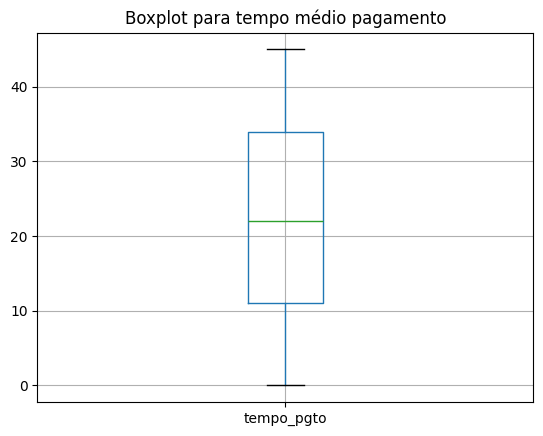

In [439]:
# verificar se há outliers e dados de tempo de pagamento discrepantes com o boxplot

df.boxplot('tempo_pgto')
plt.title('Boxplot para tempo médio pagamento')
plt.show()

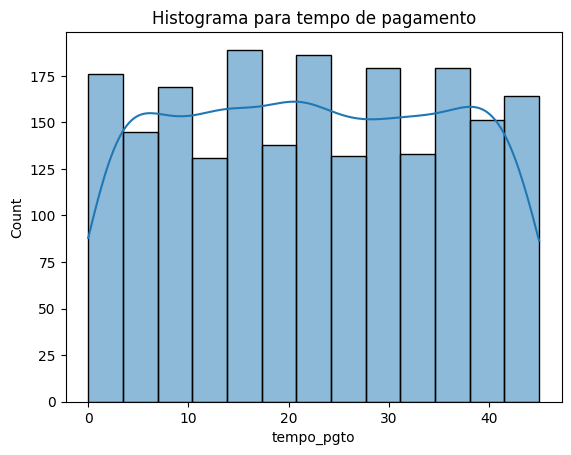

In [440]:
import seaborn as sns

sns.histplot(data=df.tempo_pgto, kde=True)
plt.title("Histograma para tempo de pagamento")
plt.show()

In [441]:
df.tempo_pgto.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pgto, dtype: float64

## TEMPO DE PAGAMENTO POR CIDADE E PRODUTO




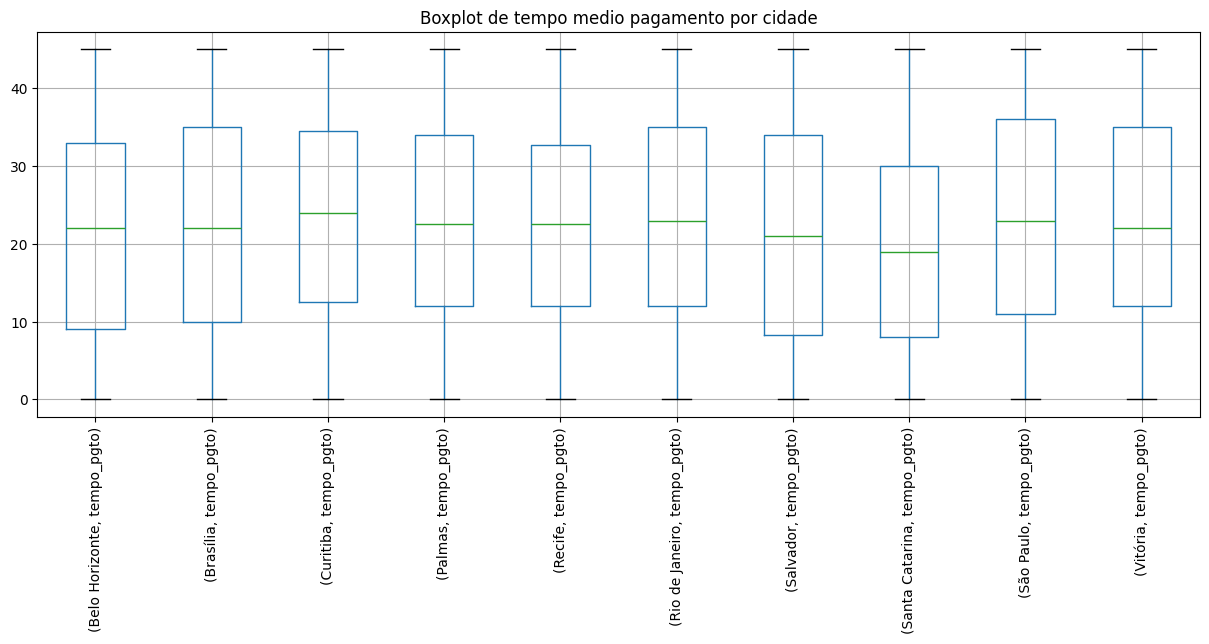

In [442]:
plt.figure(figsize=(15,5))
df[['tempo_pgto','loja_cidade']].groupby('loja_cidade').boxplot('tempo_pgto')
plt.title('Boxplot de tempo medio pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

#nao existe uma diferença grande do tempo de pagamento por cidade

## SAZONALIDADE NOS DADOS DE VENDAS

In [443]:
# fazer um grafico de barra com receita acumulada por ano e quando o mouse passa por cima,
# mostra o mes com maior venda

In [444]:
df['Year'] = df['dt_venda'].dt.year
df['Year'].astype(int)



id
1       2018
2       2018
3       2018
4       2018
5       2018
        ... 
2996    2020
2997    2020
2998    2020
2999    2020
3000    2020
Name: Year, Length: 3000, dtype: int32

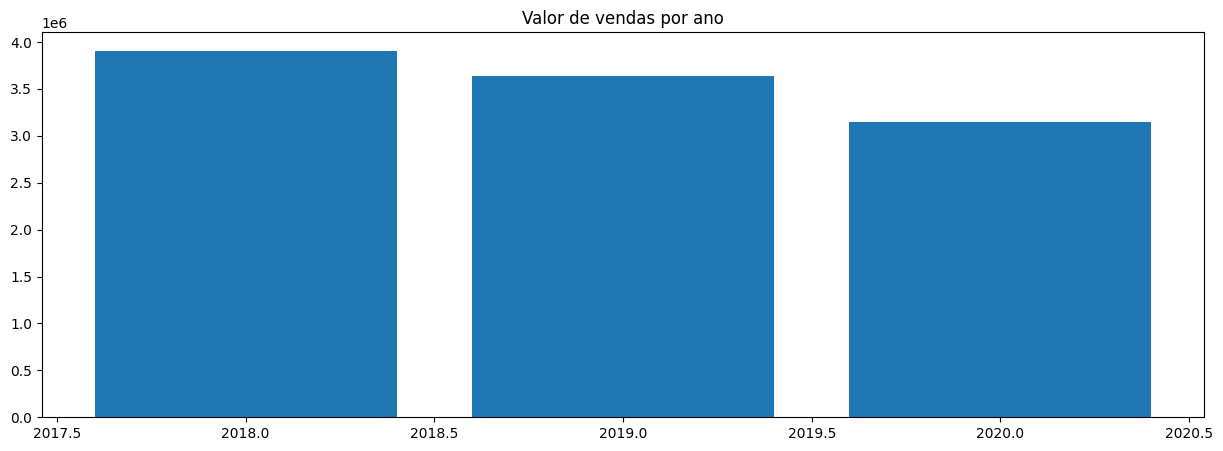

In [445]:
vendas_ano = df[['Year', 'produtos_valor']].groupby('Year').sum().produtos_valor.sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.bar(vendas_ano.index, vendas_ano.values )
plt.title("Valor de vendas por ano")

plt.show()


### ANALISE DO TEMPO DE PAGAMENTO EM COMPRAS POR PROMOÇÃO


In [446]:
df_vendas_promoção = pd.read_csv('caso_estudo_venda_promocao(1).csv', sep=';')
df_vendas_promoção

,id_venda,promoção
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
2995,2996,0
2996,2997,0
2997,2998,0
2998,2999,0


In [447]:
df = df.join(df_vendas_promoção.set_index('id_venda'))
df

,id_cliente,id_loja,id_produto,dt_venda,clientes_nome,clientes_sexo,clientes_dt_nasc,loja_cidade,produtos_produto,produtos_valor,dt_pgto,pg,tempo_pgto,Year,promoção
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,2020,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,2020,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,2020,0


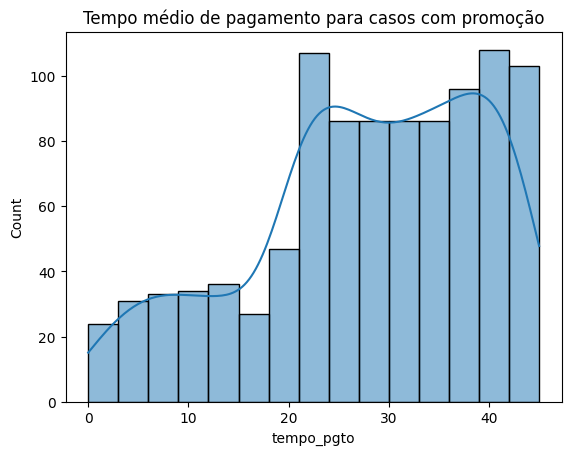

In [448]:
sns.histplot(data=df.tempo_pgto[df['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos com promoção')
plt.show()

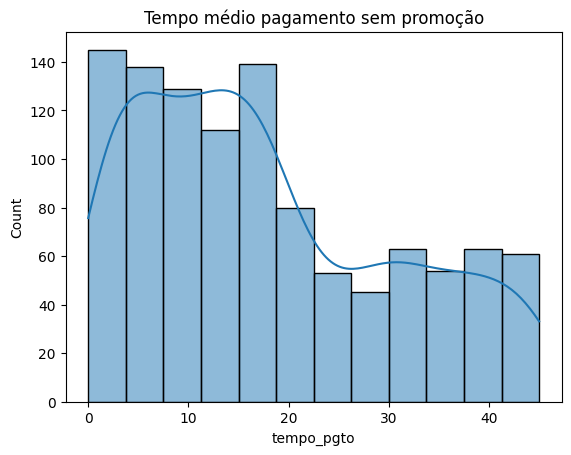

In [449]:
sns.histplot(data=df.tempo_pgto[df['promoção']==0], kde=True)
plt.title('Tempo médio pagamento sem promoção')
plt.show()

## ANALISE DE INADIMPLENCIA


### INADIMPLENCIA POR LOJA

In [450]:
inad_lojas = df[df.pg==0].groupby('loja_cidade').count().produtos_valor.sort_values(ascending=False)

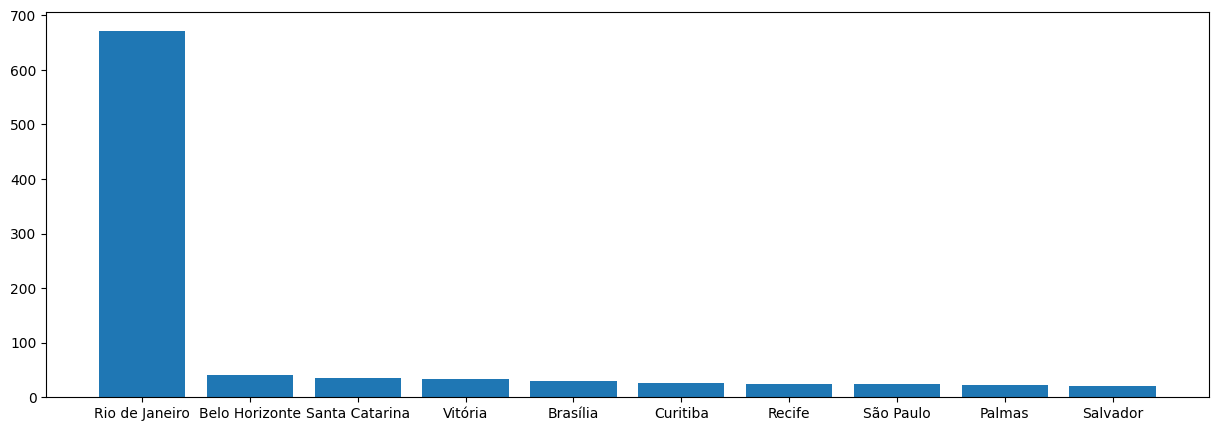

In [451]:
plt.figure(figsize=(15,5))
plt.bar(inad_lojas.index,inad_lojas.values)
plt.show()

### INADIMPLENCIA POR PRODUTO

In [452]:
inad_prod = df[df.pg == 0].groupby('produtos_produto').count().produtos_valor.sort_values(ascending=False)

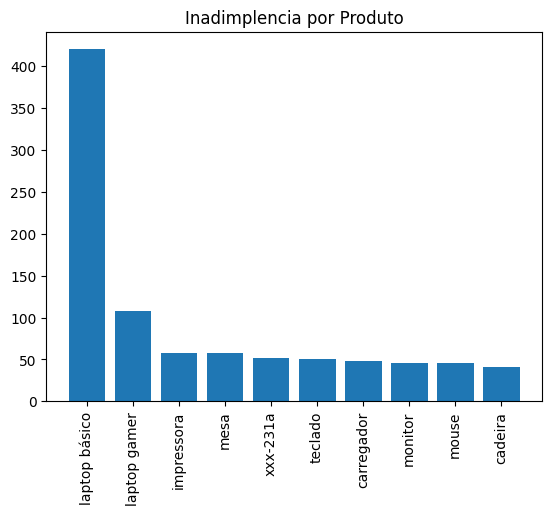

In [453]:

plt.bar(inad_prod.index, inad_prod.values)
plt.xticks(rotation=90)
plt.title('Inadimplencia por Produto')


plt.show()

### INADIMPLENCIA POR IDADE

In [454]:
from datetime import date, datetime

today = date.today()

df['cliente_idade'] = today.year - df.clientes_dt_nasc.dt.year

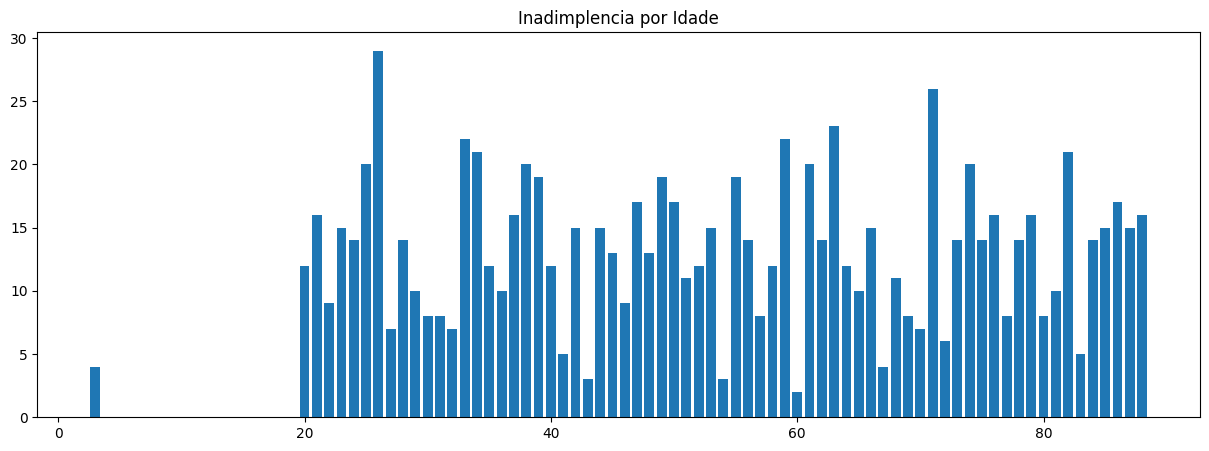

In [455]:
inad_idade = df[df.pg == 0].groupby('cliente_idade').count().produtos_valor.sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.bar(inad_idade.index,inad_idade.values)
plt.title('Inadimplencia por Idade')

plt.show()

# reparamos que não há um padrão de crescimento ou decrescimento no numero de pagamentos
# a medida que aumenta a idade do cliente

### MAPA DE CALOR DE INADIMPLENCIA


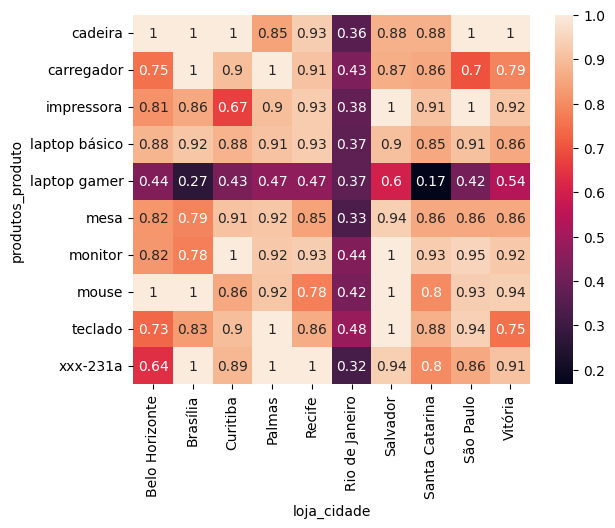

In [456]:
import seaborn as sns 

mapa_inad = df.pivot_table(index='produtos_produto', columns='loja_cidade', values='pg', aggfunc='mean')

sns.heatmap(mapa_inad, annot=True)
plt.show()

## MACHINE LEARNING


In [457]:
dfMl = df[['clientes_sexo', 'loja_cidade', 'produtos_produto','produtos_valor', 'cliente_idade', 'promoção','pg']]
dfMl = dfMl.replace([' ', '-'], '_', regex=True)
dfMl

,clientes_sexo,loja_cidade,produtos_produto,produtos_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,2300.0,73,0,1
2,F,Palmas,laptop_básico,2300.0,51,1,1
3,M,Salvador,cadeira,540.0,61,1,1
4,M,Belo_Horizonte,laptop_básico,2300.0,82,0,0
5,M,Palmas,mouse,20.0,82,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,150.0,24,0,1
2997,F,Brasília,laptop_básico,2300.0,29,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,5300.0,37,0,0


### NORMALIZAÇÃO DOS DADOS

In [458]:
# vamos fazer com que os dados numericos variem de 0 a 1, para fazer com que o processador trabalhe menos
# e que o modelo nao tenha que distinguir valores com diferenças discrepantes


dfMl['produtos_valor'] = dfMl['produtos_valor'] / dfMl['produtos_valor'].max()
dfMl['cliente_idade'] = dfMl['cliente_idade'] / dfMl['cliente_idade'].max()

dfMl


,clientes_sexo,loja_cidade,produtos_produto,produtos_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,0.071621,0.820225,0,1
2,F,Palmas,laptop_básico,0.071621,0.573034,1,1
3,M,Salvador,cadeira,0.016815,0.685393,1,1
4,M,Belo_Horizonte,laptop_básico,0.071621,0.921348,0,0
5,M,Palmas,mouse,0.000623,0.921348,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,0.004671,0.269663,0,1
2997,F,Brasília,laptop_básico,0.071621,0.325843,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,0.165040,0.415730,0,0


### DADOS CATEGORICOS

In [459]:
col_cat = ['clientes_sexo','loja_cidade', 'produtos_produto', 'promoção']
dfMl_dummies = pd.get_dummies(dfMl[col_cat].astype(str), drop_first=False)

dfMl_dummies


,clientes_sexo_F,clientes_sexo_M,clientes_sexo_o,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produtos_produto_impressora,produtos_produto_laptop_básico,produtos_produto_laptop_gamer,produtos_produto_mesa,produtos_produto_monitor,produtos_produto_mouse,produtos_produto_teclado,produtos_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2997,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [460]:
dfMl_dummies

,clientes_sexo_F,clientes_sexo_M,clientes_sexo_o,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produtos_produto_impressora,produtos_produto_laptop_básico,produtos_produto_laptop_gamer,produtos_produto_mesa,produtos_produto_monitor,produtos_produto_mouse,produtos_produto_teclado,produtos_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2997,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [461]:
dfMl = pd.concat([dfMl, dfMl_dummies],axis=1)
dfMl = dfMl.drop(col_cat,axis=1)
dfMl 

,produtos_valor,cliente_idade,pg,clientes_sexo_F,clientes_sexo_M,clientes_sexo_o,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,...,produtos_produto_impressora,produtos_produto_laptop_básico,produtos_produto_laptop_gamer,produtos_produto_mesa,produtos_produto_monitor,produtos_produto_mouse,produtos_produto_teclado,produtos_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.071621,0.820225,1,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,0.071621,0.573034,1,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3,0.016815,0.685393,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.071621,0.921348,0,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5,0.000623,0.921348,1,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.004671,0.269663,1,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2997,0.071621,0.325843,1,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,0.165040,0.415730,0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


### DADOS DE TREINAMENTO E TESTE

In [462]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y = dfMl.pg     #coluna target (y)
x = dfMl.drop(['pg'],axis=1) #dados de entrada (x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_new = x.loc[[2997, 2998]]
x_new

,produtos_valor,cliente_idade,clientes_sexo_F,clientes_sexo_M,clientes_sexo_o,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,...,produtos_produto_impressora,produtos_produto_laptop_básico,produtos_produto_laptop_gamer,produtos_produto_mesa,produtos_produto_monitor,produtos_produto_mouse,produtos_produto_teclado,produtos_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
2997,0.071621,0.325843,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,0.165040,0.415730,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


### REGRESSAO LOGISTICA

In [464]:
import statsmodels.api as stm 
import statsmodels.formula.api as smf 
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfMl.drop(['pg'], axis=1).columns)
modelo = smf.glm(formula='pg ~' + all_col_with_plus, data=dfMl, family =stm.families.Binomial()).fit()

print(modelo.summary())


# quando o P valor é baixo (menor que 5%) e seu coef alto, devemos levar em consideração o valor dessa
# variavel para o modelo

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.6
Date:                Wed, 27 Dec 2023   Deviance:                       2677.1
Time:                        12:30:10   Pearson chi2:                 3.01e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2916
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [465]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(x_train, y_train)

print('matriz de confusão')
print(confusion_matrix(y_test, model.predict(x_test))) # vai gerar a previsao nos dados de teste
print('\n - Reporte Completo')
print(classification_report(y, model.predict(x)))
print('\n - Reporte Teste')
print(classification_report(y_test, model.predict(x_test)))

C:\Users\celio\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


matriz de confusão
[[180 115]
 [ 76 529]]

 - Reporte Completo
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       928
           1       0.83      0.89      0.86      2072

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000


 - Reporte Teste
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       295
           1       0.82      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



In [467]:
# reutilizando o modelo ja treinado com novos dados

model.predict(x_new) # ele vai classificar o pg das linhas 2997(1) e 2998(0), e acertou a classificação pg

array([1, 0], dtype=int64)

### ARVORE DE DECISÃO 

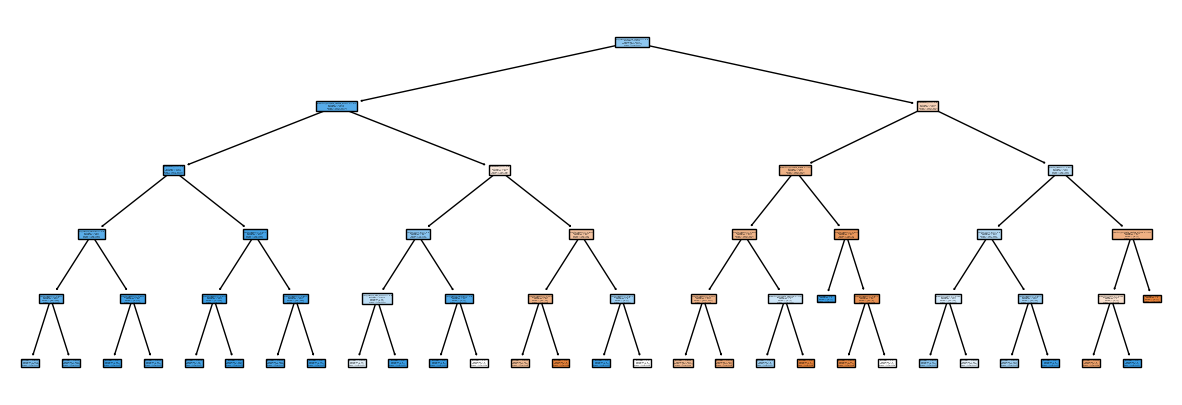

In [471]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_tree = model_tree.fit(x_train, y_train)
fig = plt.figure(figsize=(15,5))
_ = tree.plot_tree(model_tree, feature_names=x.columns, class_names=['targetNo', 'targetYes'], filled=True)
plt.show()


In [472]:
model_tree.predict(x_new)

array([1, 0], dtype=int64)